In [25]:
import warnings
warnings.filterwarnings('ignore')  # 忽略掉警告信息

(30000, 25)
0    23364
1     6636
Name: default.payment.next.month, dtype: int64


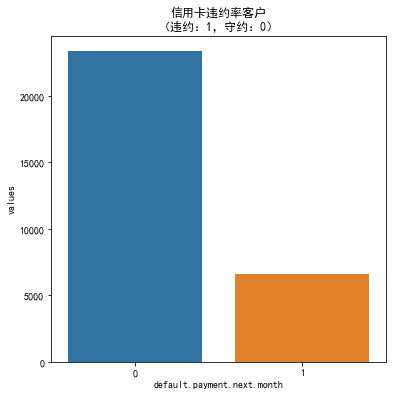

 最优分数： 0.8187
 最优参数： {'adaBoostClassifier__n_estimators': 10}
准确率: 0.8129


In [26]:
# -*- coding: utf-8 -*-
# 使用 AdaBoost 进行信用卡违约率分析
# 利用 GridSearchCV 寻找最优参数, 使用 Pipeline 进行流水作业
from sklearn.model_selection import learning_curve, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 数据加载
data = pd.read_csv('./UCI_Credit_Card.csv')

# 探索数据
print(data.shape)   # 查看数据集大小
# print(data.describe())  # 数据集概览

# 查看下一个月违约率的情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

df = pd.DataFrame({'default.payment.next.month' : next_month.index, 'values' : next_month.values})
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.figure(figsize=(6,6))
plt.title('信用卡违约率客户\n（违约：1，守约：0）')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment.next.month', y = 'values', data=df)
locs, labels = plt.xticks()
plt.show()

# 特征选择，去掉ID字段和最后一列
data.drop(['ID'], inplace = True, axis = 1) # ID字段没用
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values
# 30% 作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.3, stratify = target, random_state = 1)

# 创建AdaBoost分类器
Ada = AdaBoostClassifier(random_state = 1)
# 需要调整的参数
parameters = {'adaBoostClassifier__n_estimators': [10, 50, 100]}
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('adaBoostClassifier', Ada)
])
# 使用 GridSearchCV 进行参数调优
clf = GridSearchCV(estimator=pipeline, param_grid=parameters)

# 对数据集进行分类
clf.fit(train_x, train_y)
print(" 最优分数： %.4lf" %clf.best_score_)
print(" 最优参数：", clf.best_params_)

# 预测
predict_y = clf.predict(test_x)
print('准确率: %0.4lf'%accuracy_score(test_y, predict_y))